C:\Users\48664\AppData\Local\Temp\ipykernel_20896\1397983266.py:9: RuntimeWarning: overflow encountered in scalar multiply
  dx = -2 * (1 - x) - 400 * x * (y - x**2)
C:\Users\48664\AppData\Local\Temp\ipykernel_20896\1397983266.py:23: RuntimeWarning: invalid value encountered in subtract
  pos -= lr * grad
C:\Users\48664\AppData\Local\Temp\ipykernel_20896\1397983266.py:25: RuntimeWarning: invalid value encountered in add
  v = beta1 * v + lr * grad


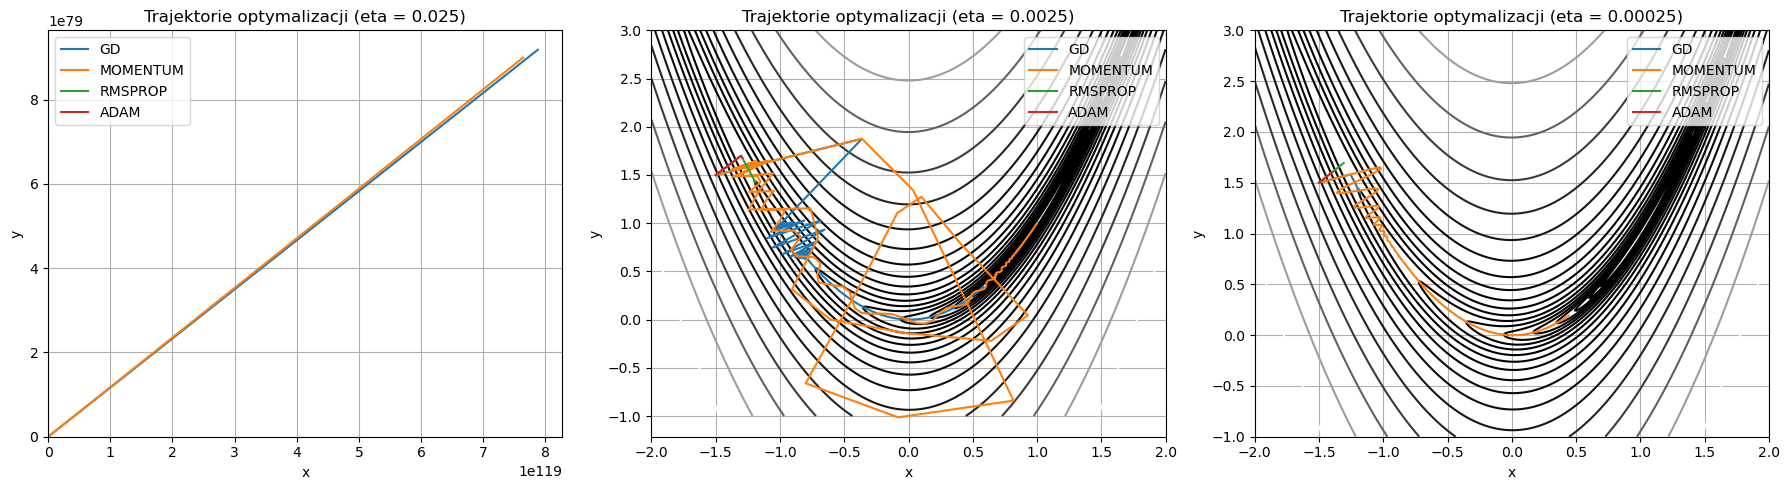

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja Rosenbrocka i jej gradient
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

# Funkcja optymalizacji
def optimize_path(opt_name, lr=0.001, steps=500):
    pos = np.array([-1.5, 1.5])
    path = [pos.copy()]
    v, s = np.zeros(2), np.zeros(2)
    beta1, beta2 = 0.9, 0.999
    eps = 1e-8
    for t in range(1, steps + 1):
        grad = rosenbrock_grad(*pos)
        if opt_name == 'gd':
            pos -= lr * grad
        elif opt_name == 'momentum':
            v = beta1 * v + lr * grad
            pos -= v
        elif opt_name == 'rmsprop':
            s = beta2 * s + (1 - beta2) * grad**2
            pos -= lr / (np.sqrt(s) + eps) * grad
        elif opt_name == 'adam':
            v = beta1 * v + (1 - beta1) * grad
            s = beta2 * s + (1 - beta2) * grad**2
            v_corr = v / (1 - beta1**t)
            s_corr = s / (1 - beta2**t)
            pos -= lr * v_corr / (np.sqrt(s_corr) + eps)
        path.append(pos.copy())
    return np.array(path)

# Zakres siatki
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Wartości learning rate do przetestowania
etas = [0.025, 0.0025, 0.00025]

# Rysowanie trzech wykresów
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, eta in enumerate(etas):
    ax = axes[i]
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='gray')
    for opt in ['gd', 'momentum', 'rmsprop', 'adam']:
        path = optimize_path(opt, lr=eta)
        ax.plot(path[:, 0], path[:, 1], label=opt.upper())
    ax.set_title(f"Trajektorie optymalizacji (eta = {eta})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

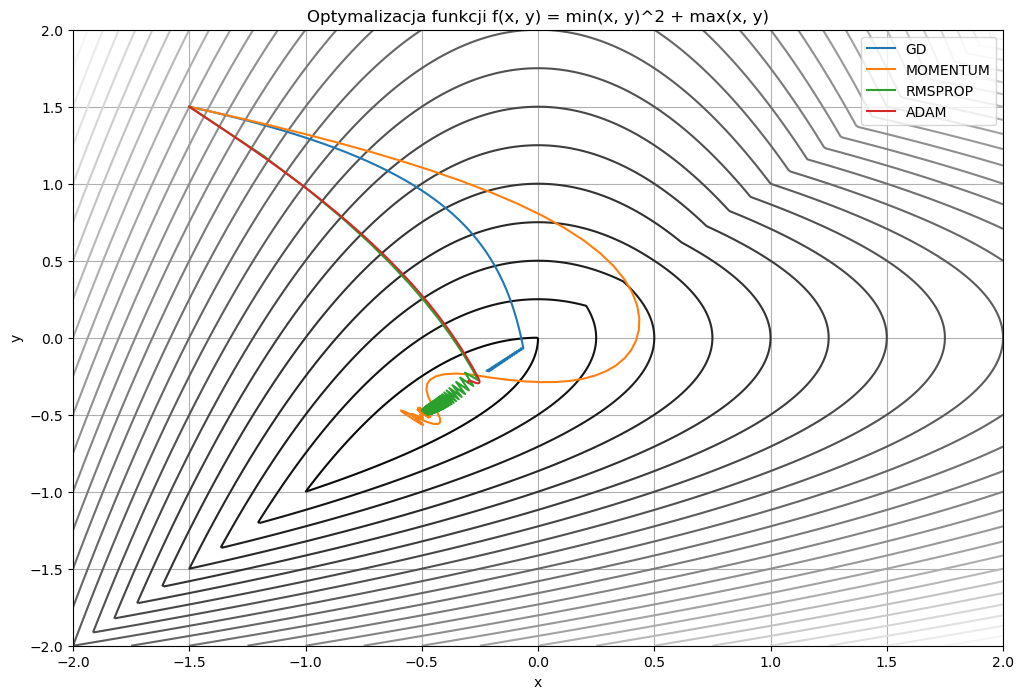

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja celu
def f(x, y):
    return np.minimum(x, y)**2 + np.maximum(x, y)

# Gradient funkcji celu (przybliżony numerycznie)
def f_grad(x, y, h=1e-5):
    fx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    fy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([fx, fy])

# Funkcja optymalizacji
def optimize_path(opt_name, lr=0.01, steps=200):
    pos = np.array([-1.5, 1.5])
    path = [pos.copy()]
    v, s = np.zeros(2), np.zeros(2)
    beta1, beta2 = 0.9, 0.999
    eps = 1e-8

    for t in range(1, steps + 1):
        grad = f_grad(*pos)
        if opt_name == 'gd':
            pos -= lr * grad
        elif opt_name == 'momentum':
            v = beta1 * v + lr * grad
            pos -= v
        elif opt_name == 'rmsprop':
            s = beta2 * s + (1 - beta2) * grad**2
            pos -= lr / (np.sqrt(s) + eps) * grad
        elif opt_name == 'adam':
            v = beta1 * v + (1 - beta1) * grad
            s = beta2 * s + (1 - beta2) * grad**2
            v_corr = v / (1 - beta1**t)
            s_corr = s / (1 - beta2**t)
            pos -= lr * v_corr / (np.sqrt(s_corr) + eps)
        path.append(pos.copy())

    return np.array(path)

# Rysowanie wykresu
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z, levels=30, cmap='gray')

# Uruchomienie optymalizacji dla każdej metody
for opt in ['gd', 'momentum', 'rmsprop', 'adam']:
    path = optimize_path(opt, lr=0.01)
    plt.plot(path[:, 0], path[:, 1], label=opt.upper())

plt.title("Optymalizacja funkcji f(x, y) = min(x, y)^2 + max(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()



In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
import datetime
import os

# Przygotowanie danych (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

# Funkcja tworząca model MLP z daną aktywacją
def create_model(activation):
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation=activation),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Lista funkcji aktywacji do przetestowania
activations = ['relu', 'sigmoid', 'tanh']

# Trening modeli z różnymi aktywacjami i logowanie do TensorBoard
for act in activations:
    log_dir = os.path.join("logs", "activations", act + "_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir,
        histogram_freq=1,
        write_graph=True
    )
    
    print(f"Trenowanie modelu z aktywacją: {act}")
    model = create_model(act)
    model.fit(
        x_train, y_train,
        epochs=5,
        validation_data=(x_test, y_test),
        callbacks=[tensorboard_callback]
    )

Trenowanie modelu z aktywacją: relu
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8816 - loss: 0.4212 - val_accuracy: 0.9611 - val_loss: 0.1370
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9648 - loss: 0.1216 - val_accuracy: 0.9695 - val_loss: 0.0996
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.0810 - val_accuracy: 0.9747 - val_loss: 0.0812
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9819 - loss: 0.0600 - val_accuracy: 0.9760 - val_loss: 0.0775
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9761 - val_loss: 0.0765
Trenowanie modelu z aktywacją: sigmoid
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8384 - loss: 0.6645 - val_accuracy: 0.9352 - val_loss: 0.2286
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9399 - loss: 0.2102 - val_accuracy: 0.9526 - val_loss: 0.1598
Epoch 3/5
1875/1875 ━

In [21]:
!pip install tensorboard



In [23]:
%load_ext tensorboard
%tensorboard --logdir logs/activations